In [9]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [60]:
b=[[10 , 0.1] , [0.1 , 1]]
R0=[]
T0=[]
n=[0.2 , 0.8]
for i  in range (0 , 3601):
    g = [1+i*0.001 , 1+0.001*(3600-i)]
    R0.append(findR0( b ,g , n))
    T0.append(findT0( b ,g , n))

In [46]:
temp1=[]
Range1=[]
temp2=[]
Range2=[]
for i in range(0 , 3601):
    x=R0[i]
    if x<=1:
        Range1.append(i)
        temp1.append(x)
    elif x>1:
        Range2.append(i)
        temp2.append(x)

In [76]:
koft1=[]
range1=[]
koft2=[]
range2=[]
for i in range(0 , 3601):
    x=T0[i]
    if x==min(T0):
        print(i , x)
        range1.append(i)
        koft1.append(x)
    else:
        range2.append(i)
        koft2.append(x)

2181 0.32955413524461147


In [89]:
def saveFig(name   ):
    SMALL_SIZE = 12
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 18

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.rc('axes', linewidth = 3 )
    plt.rc('lines', linewidth = 3 )
    plt.rc('lines', markersize = 5 )
    plt.rc('figure', figsize=(8,5) )
    plt.plot(range2 ,koft2 , color='red'  )
    plt.plot(range1 , koft1 ,  'o' ,color='blue')
    #plt.plot(np.arange(0 , 3601) , T0)
    plt.xlim(0 , 3600)
    #plt.legend(shadow=True)
    plt.ylim(0 , max(T0))
    plt.title(' T0 vs Medical treatment ')
    plt.xlabel('#Nurses  in H-R hospital')
    plt.ylabel('T0')
    plt.savefig(r'C:\Users\asus\Desktop\\'+name+'.png' , dpi=200)


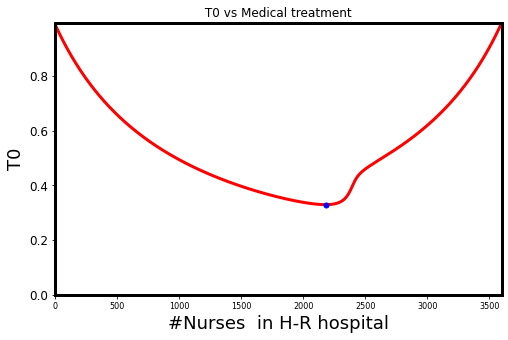

In [90]:
saveFig(' T0 good  ')

In [2]:
def findR0(beta , gamma , population):
    #initialize
    Bhh=beta[0][0]
    Bhl=beta[0][1]
    Blh=beta[1][0]
    Bll=beta[1][1]
    gammah=gamma[0]
    gammal=gamma[1]
    nh=population[0]
    nl=population[1]
    #make matrix R0 by the formula introduced in the book
    R0matrix=[]
    R0matrix.append([])
    R0matrix.append([])
    R0matrix[0]=[Bhh*nh-gammah , Bhl*nh]
    R0matrix[1]=[Blh*nl , Bll*nl-gammal]
    #find the eigen values and eigen vectors
    eigenValues , eigenVectors=LA.eig(R0matrix)
    Max=eigenValues[0]
    MaxIndex=0
    for i in range(1 , len(eigenValues)):
        if eigenValues[i]>Max:
            Max=eigenValues[i]
            MaxIndex=i
    GoodEigenVector=eigenVectors[: , MaxIndex]
    R0h=findR0h(beta , gamma , population)
    R0l=findR0l(beta , gamma , population)
    I=findIhIs(GoodEigenVector , population)
    Is=I[1]
    Ih=I[0]
    return R0h*Ih+R0l*Is
   
    

In [59]:
def findT0(beta , gamma , population):
    #initialize
    Bhh=beta[0][0]
    Bhl=beta[0][1]
    Blh=beta[1][0]
    Bll=beta[1][1]
    gammah=gamma[0]
    gammal=gamma[1]
    nh=population[0]
    nl=population[1]
    #make matrix R0 by the formula introduced in the book
    R0matrix=[]
    R0matrix.append([])
    R0matrix.append([])
    R0matrix[0]=[Bhh*nh-gammah , Bhl*nh]
    R0matrix[1]=[Blh*nl , Bll*nl-gammal]
    #find the eigen values and eigen vectors
    eigenValues , eigenVectors=LA.eig(R0matrix)
    Max=eigenValues[0]
    MaxIndex=0
    for i in range(1 , len(eigenValues)):
        if eigenValues[i]>Max:
            Max=eigenValues[i]
            MaxIndex=i
    GoodEigenVector=eigenVectors[: , MaxIndex]
    R0h=findR0h(beta , gamma , population)
    R0l=findR0l(beta , gamma , population)
    I=findIhIs(GoodEigenVector , population)
    Is=I[1]
    Ih=I[0]
    return Ih/gammah+Is/gammal
   
    

In [3]:
def findR0h(beta , gamma , population):
    #initialize
    Bhh=beta[0][0]
    Bhl=beta[0][1]
    Blh=beta[1][0]
    Bll=beta[1][1]
    gammah=gamma[0]
    gammal=gamma[1]
    nh=population[0]
    nl=population[1]
    return ((Bhh*nh+Blh*nl)/gammah)
    

In [4]:
def findR0l(beta , gamma , population):
    #initialize
    Bhh=beta[0][0]
    Bhl=beta[0][1]
    Blh=beta[1][0]
    Bll=beta[1][1]
    gammah=gamma[0]
    gammal=gamma[1]
    nh=population[0]
    nl=population[1]
    return ((Bll*nl+Blh*nh)/gammal)

In [5]:
def findIhIs(eigenvector , population):
    fraction = sum(population)
    m=eigenvector[0]/eigenvector[1]
    Ih= m/(m+fraction)
    Is=1/(m+fraction)
    temp=[Ih , Is]
    return temp